# Title: AIDI 1002 Final Term Project Report

#### Members' Names or Individual's Name: Aishwarya Sivacoumar and Jaivanth Vaja Shanmuga Sundram

####  Emails: 200543267@student.georgianc.on.ca and 200599084@student.georgianc.on.ca

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [2]:
covid_data = pd.read_csv("Covid Dataset.csv")

In [3]:
covid_data

Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0                  Yes   Yes       Yes         Yes          Yes     No   
1                  Yes   Yes       Yes         Yes           No    Yes   
2                  Yes   Yes       Yes         Yes          Yes    Yes   
3                  Yes   Yes       Yes          No           No    Yes   
4                  Yes   Yes       Yes         Yes          Yes     No   
...                ...   ...       ...         ...          ...    ...   
5429               Yes   Yes        No         Yes          Yes    Yes   
5430               Yes   Yes       Yes          No          Yes    Yes   
5431               Yes   Yes       Yes          No           No     No   
5432               Yes   Yes       Yes          No          Yes     No   
5433               Yes   Yes       Yes          No          Yes    Yes   

     Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                      No       No            No      Yes  ...      Yes   
1                     Yes      Yes            No       No  ...      Yes   
2                     Yes      Yes            No      Yes  ...      Yes   
3                      No       No           Yes      Yes  ...       No   
4                     Yes      Yes           Yes      Yes  ...       No   
...                   ...      ...           ...      ...  ...      ...   
5429                  Yes       No            No       No  ...      Yes   
5430                   No      Yes            No      Yes  ...      Yes   
5431                   No       No           Yes       No  ...       No   
5432                   No      Yes           Yes       No  ...       No   
5433                   No      Yes            No      Yes  ...      Yes   

     Gastrointestinal  Abroad travel Contact with COVID Patient  \
0                  Yes            No                        Yes   
1                   No            No                         No   
2                  Yes           Yes                         No   
3                   No           Yes                         No   
4                  Yes            No                        Yes   
...                ...           ...                        ...   
5429               Yes            No                         No   
5430                No            No                         No   
5431                No            No                         No   
5432                No            No                         No   
5433                No            No                         No   

     Attended Large Gathering Visited Public Exposed Places  \
0                          No                           Yes   
1                         Yes                           Yes   
2                          No                            No   
3                         Yes                           Yes   
4                          No                           Yes   
...                       ...                           ...   
5429                       No                            No   
5430                       No                            No   
5431                       No                            No   
5432                       No                            No   
5433                       No                            No   

     Family working in Public Exposed Places Wearing Masks  \
0                                        Yes            No   
1                                         No            No   
2                                         No            No   
3                                         No            No   
4                                         No            No   
...                                      ...           ...   
5429                                      No            No   
5430                                      No            No   
5431                                      No            No   
5432                             

In [4]:
covid_data.shape

(5434, 21)

In [5]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [6]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

* The DataFrame contains 5434 rows and 21 columns.
* Each row represents a different case and each column represents a symptom or risk factor for COVID-19.
* The columns are all of the object datatype, which is used for non-numeric data.
* The "COVID-19" column indicates whether or not the case tested positive for COVID-19.

In [7]:
covid_data.describe().T

count unique  top  freq
Breathing Problem                        5434      2  Yes  3620
Fever                                    5434      2  Yes  4273
Dry Cough                                5434      2  Yes  4307
Sore throat                              5434      2  Yes  3953
Running Nose                             5434      2  Yes  2952
Asthma                                   5434      2   No  2920
Chronic Lung Disease                     5434      2   No  2869
Headache                                 5434      2  Yes  2736
Heart Disease                            5434      2   No  2911
Diabetes                                 5434      2   No  2846
Hyper Tension                            5434      2   No  2771
Fatigue                                  5434      2  Yes  2821
Gastrointestinal                         5434      2   No  2883
Abroad travel                            5434      2   No  2983
Contact with COVID Patient               5434      2  Yes  2726
Attended Large Gathering                 5434      2   No  2924
Visited Public Exposed Places            5434      2  Yes  2820
Family working in Public Exposed Places  5434      2   No  3172
Wearing Masks                            5434      1   No  5434
Sanitization from Market                 5434      1   No  5434
COVID-19                                 5434      2  Yes  4383

In [8]:
covid_data.head()

Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1                No            No                         No   
2               Yes           Yes                         No   
3                No           Yes                         No   
4               Yes            No                        Yes   

  Attended Large Gathering Visited Public Exposed Places  \
0                       No                           Yes   
1                      Yes                           Yes   
2                       No                            No   
3                      Yes                           Yes   
4                       No                           Yes   

  Family working in Public Exposed Places Wearing Masks  \
0                                     Yes            No   
1                                      No            No   
2                                      No            No   
3                                      No            No   
4                                      No            No   

  Sanitization from Market COVID-19  
0                       No      Yes  
1                       No      Yes  
2                       No      Yes  
3                       No      Yes  
4                       No      Yes  

[5 rows x 21 columns]

In [9]:
# create a table with data missing 
missing_values=covid_data.isnull().sum() # missing values

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

missing_values   percent_missing %
Breathing Problem                                      0                0.0
Fever                                                  0                0.0
Dry Cough                                              0                0.0
Sore throat                                            0                0.0
Running Nose                                           0                0.0
Asthma                                                 0                0.0
Chronic Lung Disease                                   0                0.0
Headache                                               0                0.0
Heart Disease                                          0                0.0
Diabetes                                               0                0.0
Hyper Tension                                          0                0.0
Fatigue                                                0                0.0
Gastrointestinal                                       0                0.0
Abroad travel                                          0                0.0
Contact with COVID Patient                             0                0.0
Attended Large Gathering                               0                0.0
Visited Public Exposed Places                          0                0.0
Family working in Public Exposed Places                0                0.0
Wearing Masks                                          0                0.0
Sanitization from Market                               0                0.0
COVID-19                                               0                0.0

* There are no missing values in any of the columns.
* The percent missing for each column is 0%, indicating that all rows have a value for that column.

<AxesSubplot:>

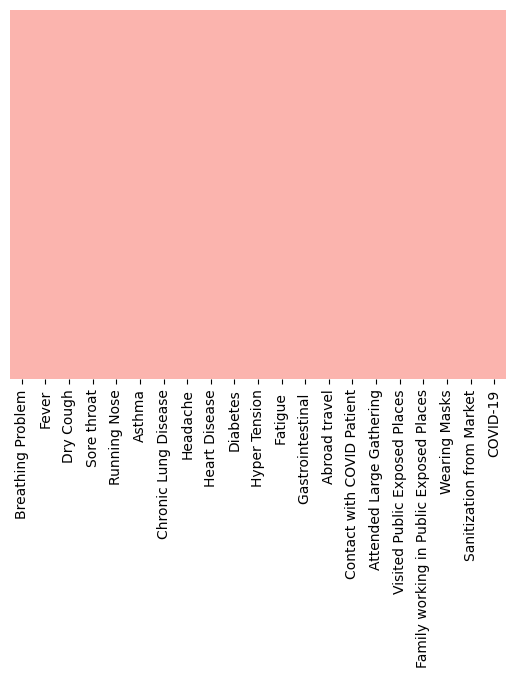

In [10]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

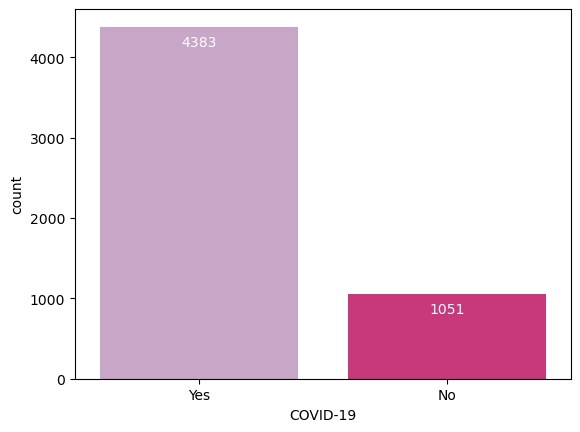

In [11]:
ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

The output of the value_counts() method it seems to indicate that there are 4383 positive cases and 1051 negative cases in the dataset.

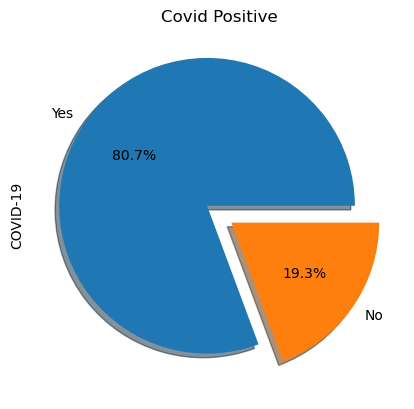

In [12]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

The pie chart generated by the code shows that 80.7% of cases in the dataset are COVID-19 positive (represented by the larger slice of the pie chart), while 19.3% are COVID-19 negative (represented by the smaller slice).

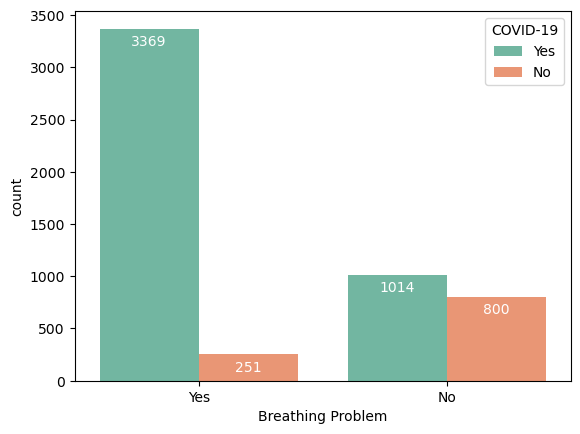

In [13]:
ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

3369 COVID-19 positive cases and 251 COVID-19 negative cases among those who have reported experiencing breathing problems. There are also 1014 COVID-19 positive cases and 800 COVID-19 negative cases among those who have not reported experiencing breathing problem

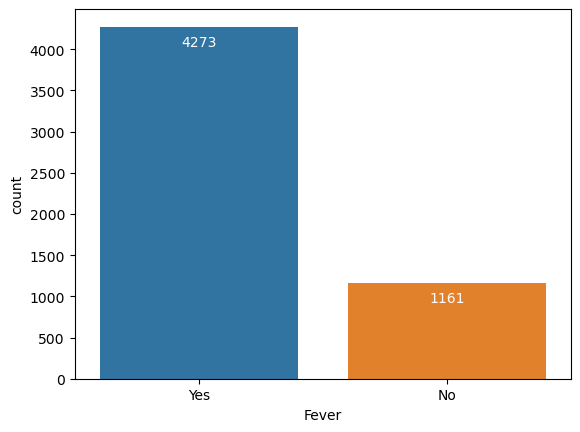

In [14]:
ax = sns.countplot(x='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

There are 4273 cases that reported experiencing fever and 1161 cases that did not report experiencing fever.

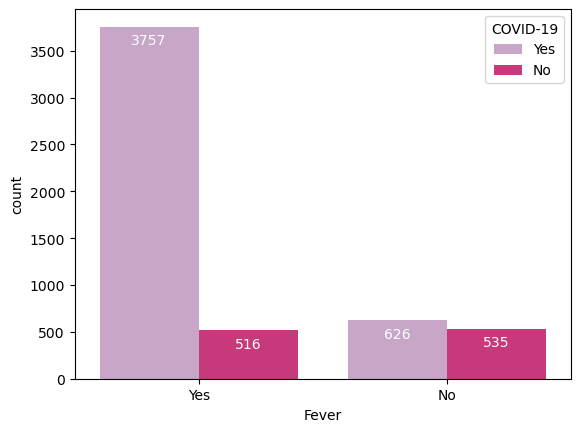

In [15]:
ax = sns.countplot(x='Fever',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

There are 3757 COVID-19 positive cases and 516 COVID-19 negative cases. Among cases that did not report experiencing fever, there are 626 COVID-19 positive cases and 535 COVID-19 negative cases.

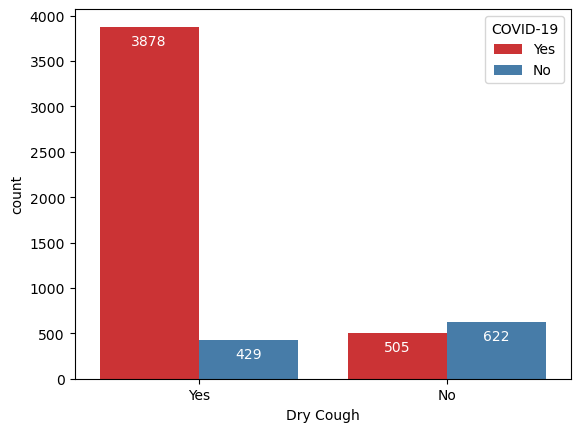

In [16]:
ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

There are 3878 COVID-19 positive cases and 429 COVID-19 negative cases. Among cases that did not report experiencing dry cough, there are 505 COVID-19 positive cases and 622 COVID-19 negative cases.

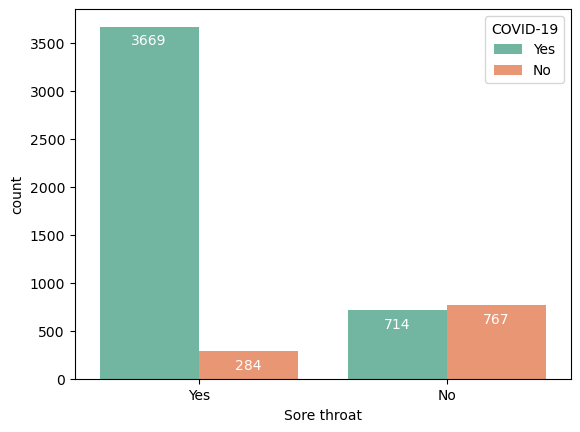

In [17]:
ax = sns.countplot(x='Sore throat',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

There are 3669 COVID-19 positive cases and 284 COVID-19 negative cases. Among cases that did not report experiencing sore throat, there are 714 COVID-19 positive cases and 767 COVID-19 negative cases.

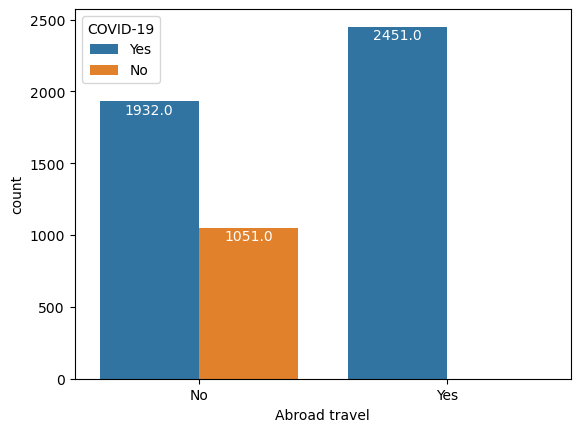

In [18]:
ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

There are 2451 COVID-19 positive cases and 0 COVID-19 negative cases. Among cases who have not traveled abroad, there are 1932 COVID-19 positive cases and 1051 COVID-19 negative cases.

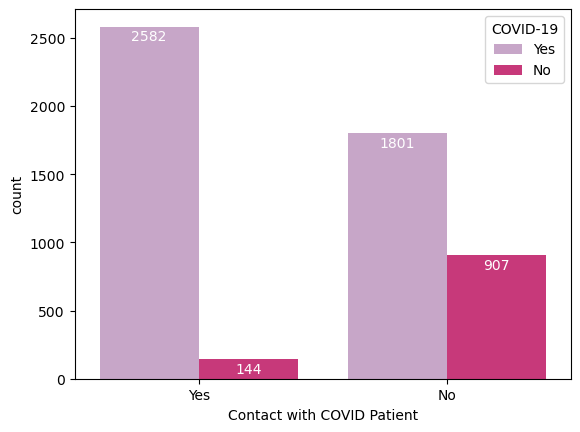

In [19]:
ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

There are 2582 COVID-19 positive cases and 144 COVID-19 negative cases. Among cases who have not had contact with COVID-19 patients, there are 1801 COVID-19 positive cases and 907 COVID-19 negative cases.

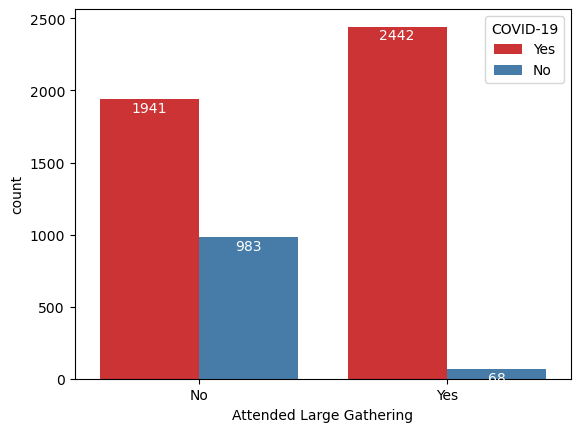

In [20]:
ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

There are 2442 COVID-19 positive cases and 68 COVID-19 negative cases. Among cases who have not attended large gatherings, there are 1941 COVID-19 positive cases and 983 COVID-19 negative cases.

In [21]:
e=LabelEncoder()

In [22]:
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])

In [23]:
covid_data.head()

Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                  1      1          1            1             1       0   
1                  1      1          1            1             0       1   
2                  1      1          1            1             1       1   
3                  1      1          1            0             0       1   
4                  1      1          1            1             1       0   

   Chronic Lung Disease  Headache  Heart Disease  Diabetes  ...  Fatigue   \
0                     0         0              0         1  ...         1   
1                     1         1              0         0  ...         1   
2                     1         1              0         1  ...         1   
3                     0         0              1         1  ...         0   
4                     1         1              1         1  ...         0   

   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0                  1              0                           1   
1                  0              0                           0   
2                  1              1                           0   
3                  0              1                           0   
4                  1              0                           1   

   Attended Large Gathering  Visited Public Exposed Places  \
0                         0                              1   
1                         1                              1   
2                         0                              0   
3                         1                              1   
4                         0                              1   

   Family working in Public Exposed Places  Wearing Masks  \
0                                        1              0   
1                                        0              0   
2                                        0              0   
3                                        0              0   
4                                        0              0   

   Sanitization from Market  COVID-19  
0                         0         1  
1                         0         1  
2                         0         1  
3                         0         1  
4                         0         1  

[5 rows x 21 columns]

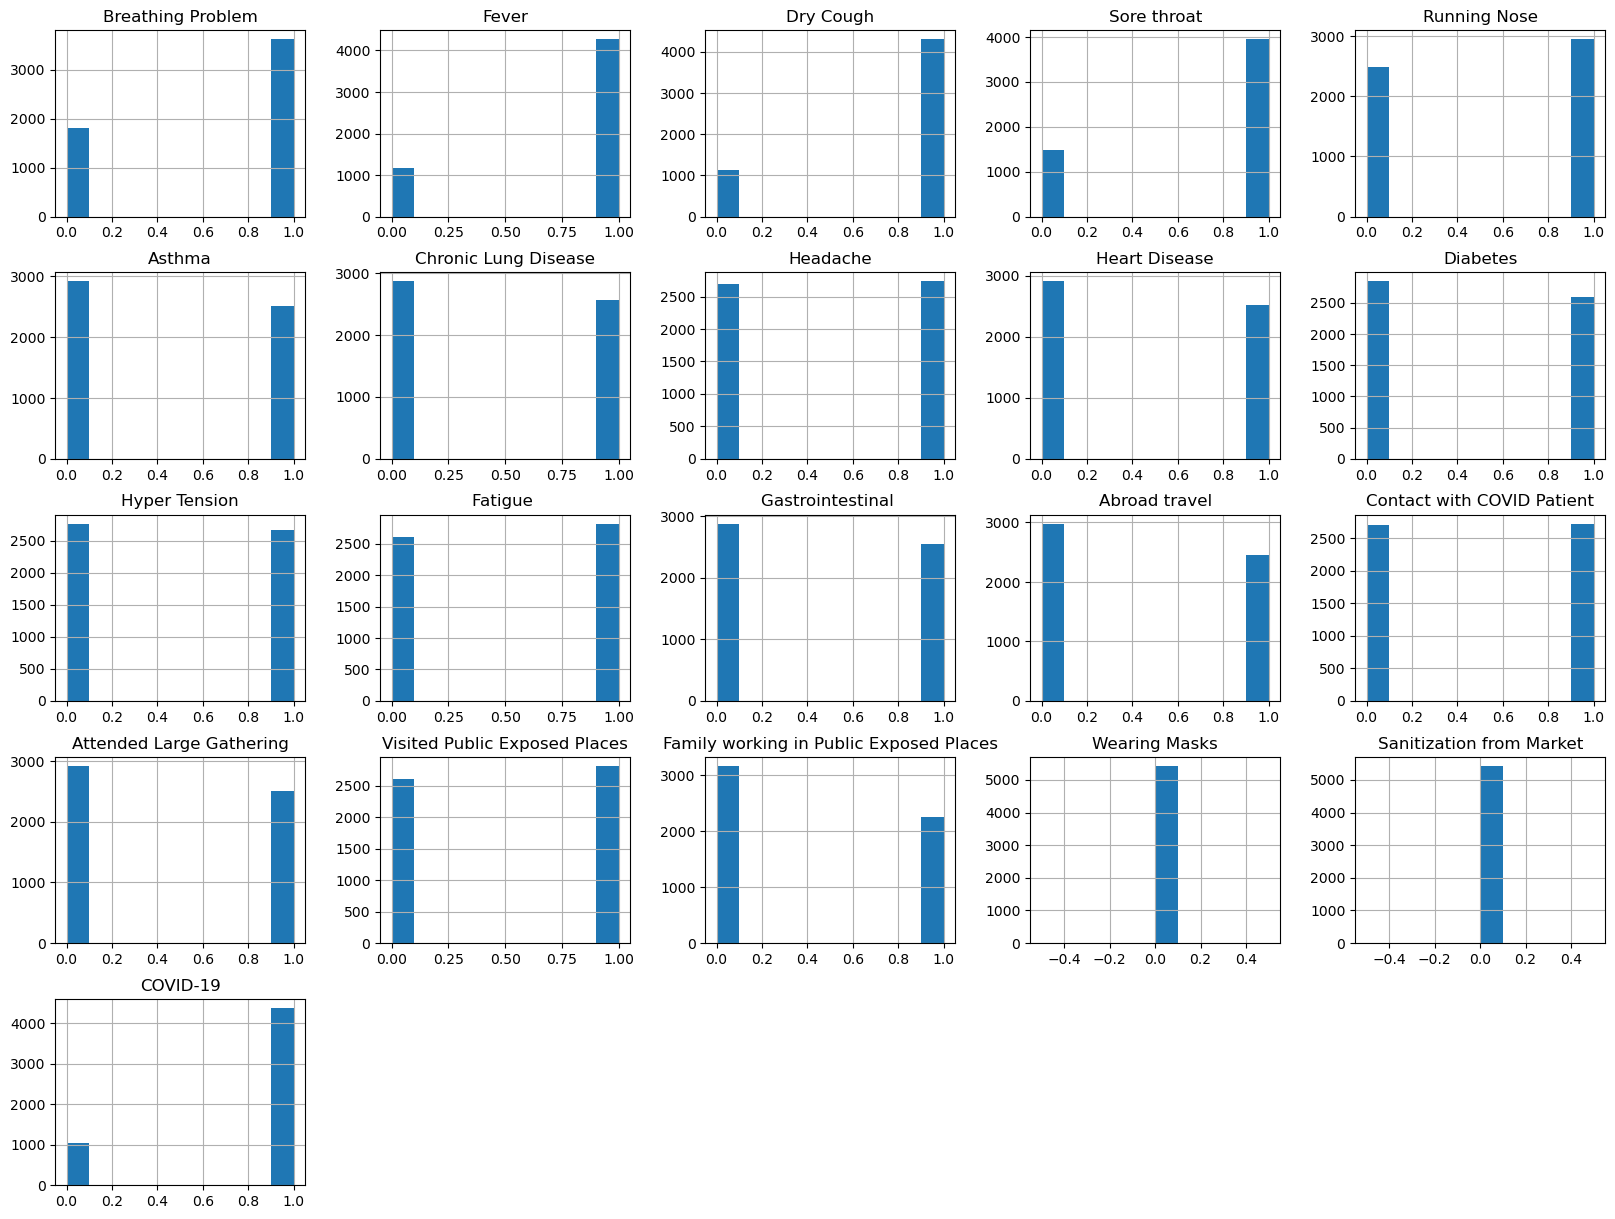

In [24]:
covid_data.hist(figsize=(20,15));

0    5434
Name: Wearing Masks, dtype: int64


<AxesSubplot:xlabel='Wearing Masks', ylabel='count'>

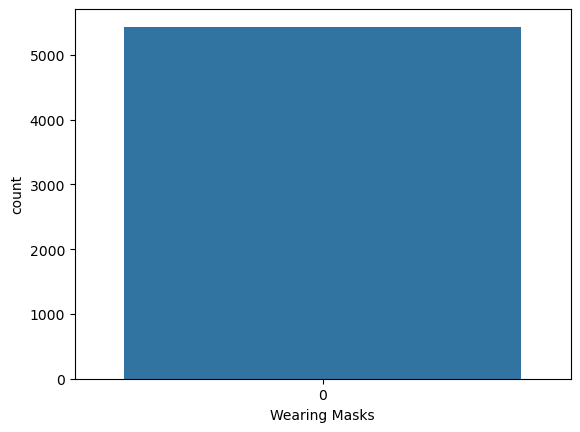

In [25]:
print(covid_data['Wearing Masks'].value_counts())
sns.countplot(x='Wearing Masks',data=covid_data)

0    5434
Name: Sanitization from Market, dtype: int64


<AxesSubplot:xlabel='Sanitization from Market', ylabel='count'>

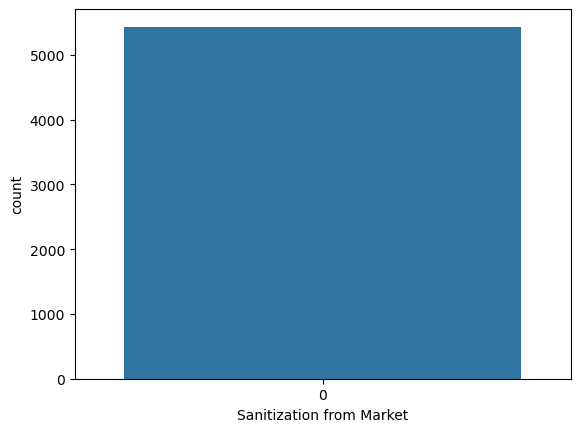

In [26]:
print(covid_data['Sanitization from Market'].value_counts())
sns.countplot(x='Sanitization from Market',data=covid_data)

In [27]:
covid_data=covid_data.drop('Wearing Masks',axis=1)
covid_data=covid_data.drop('Sanitization from Market',axis=1)

In [28]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

<AxesSubplot:>

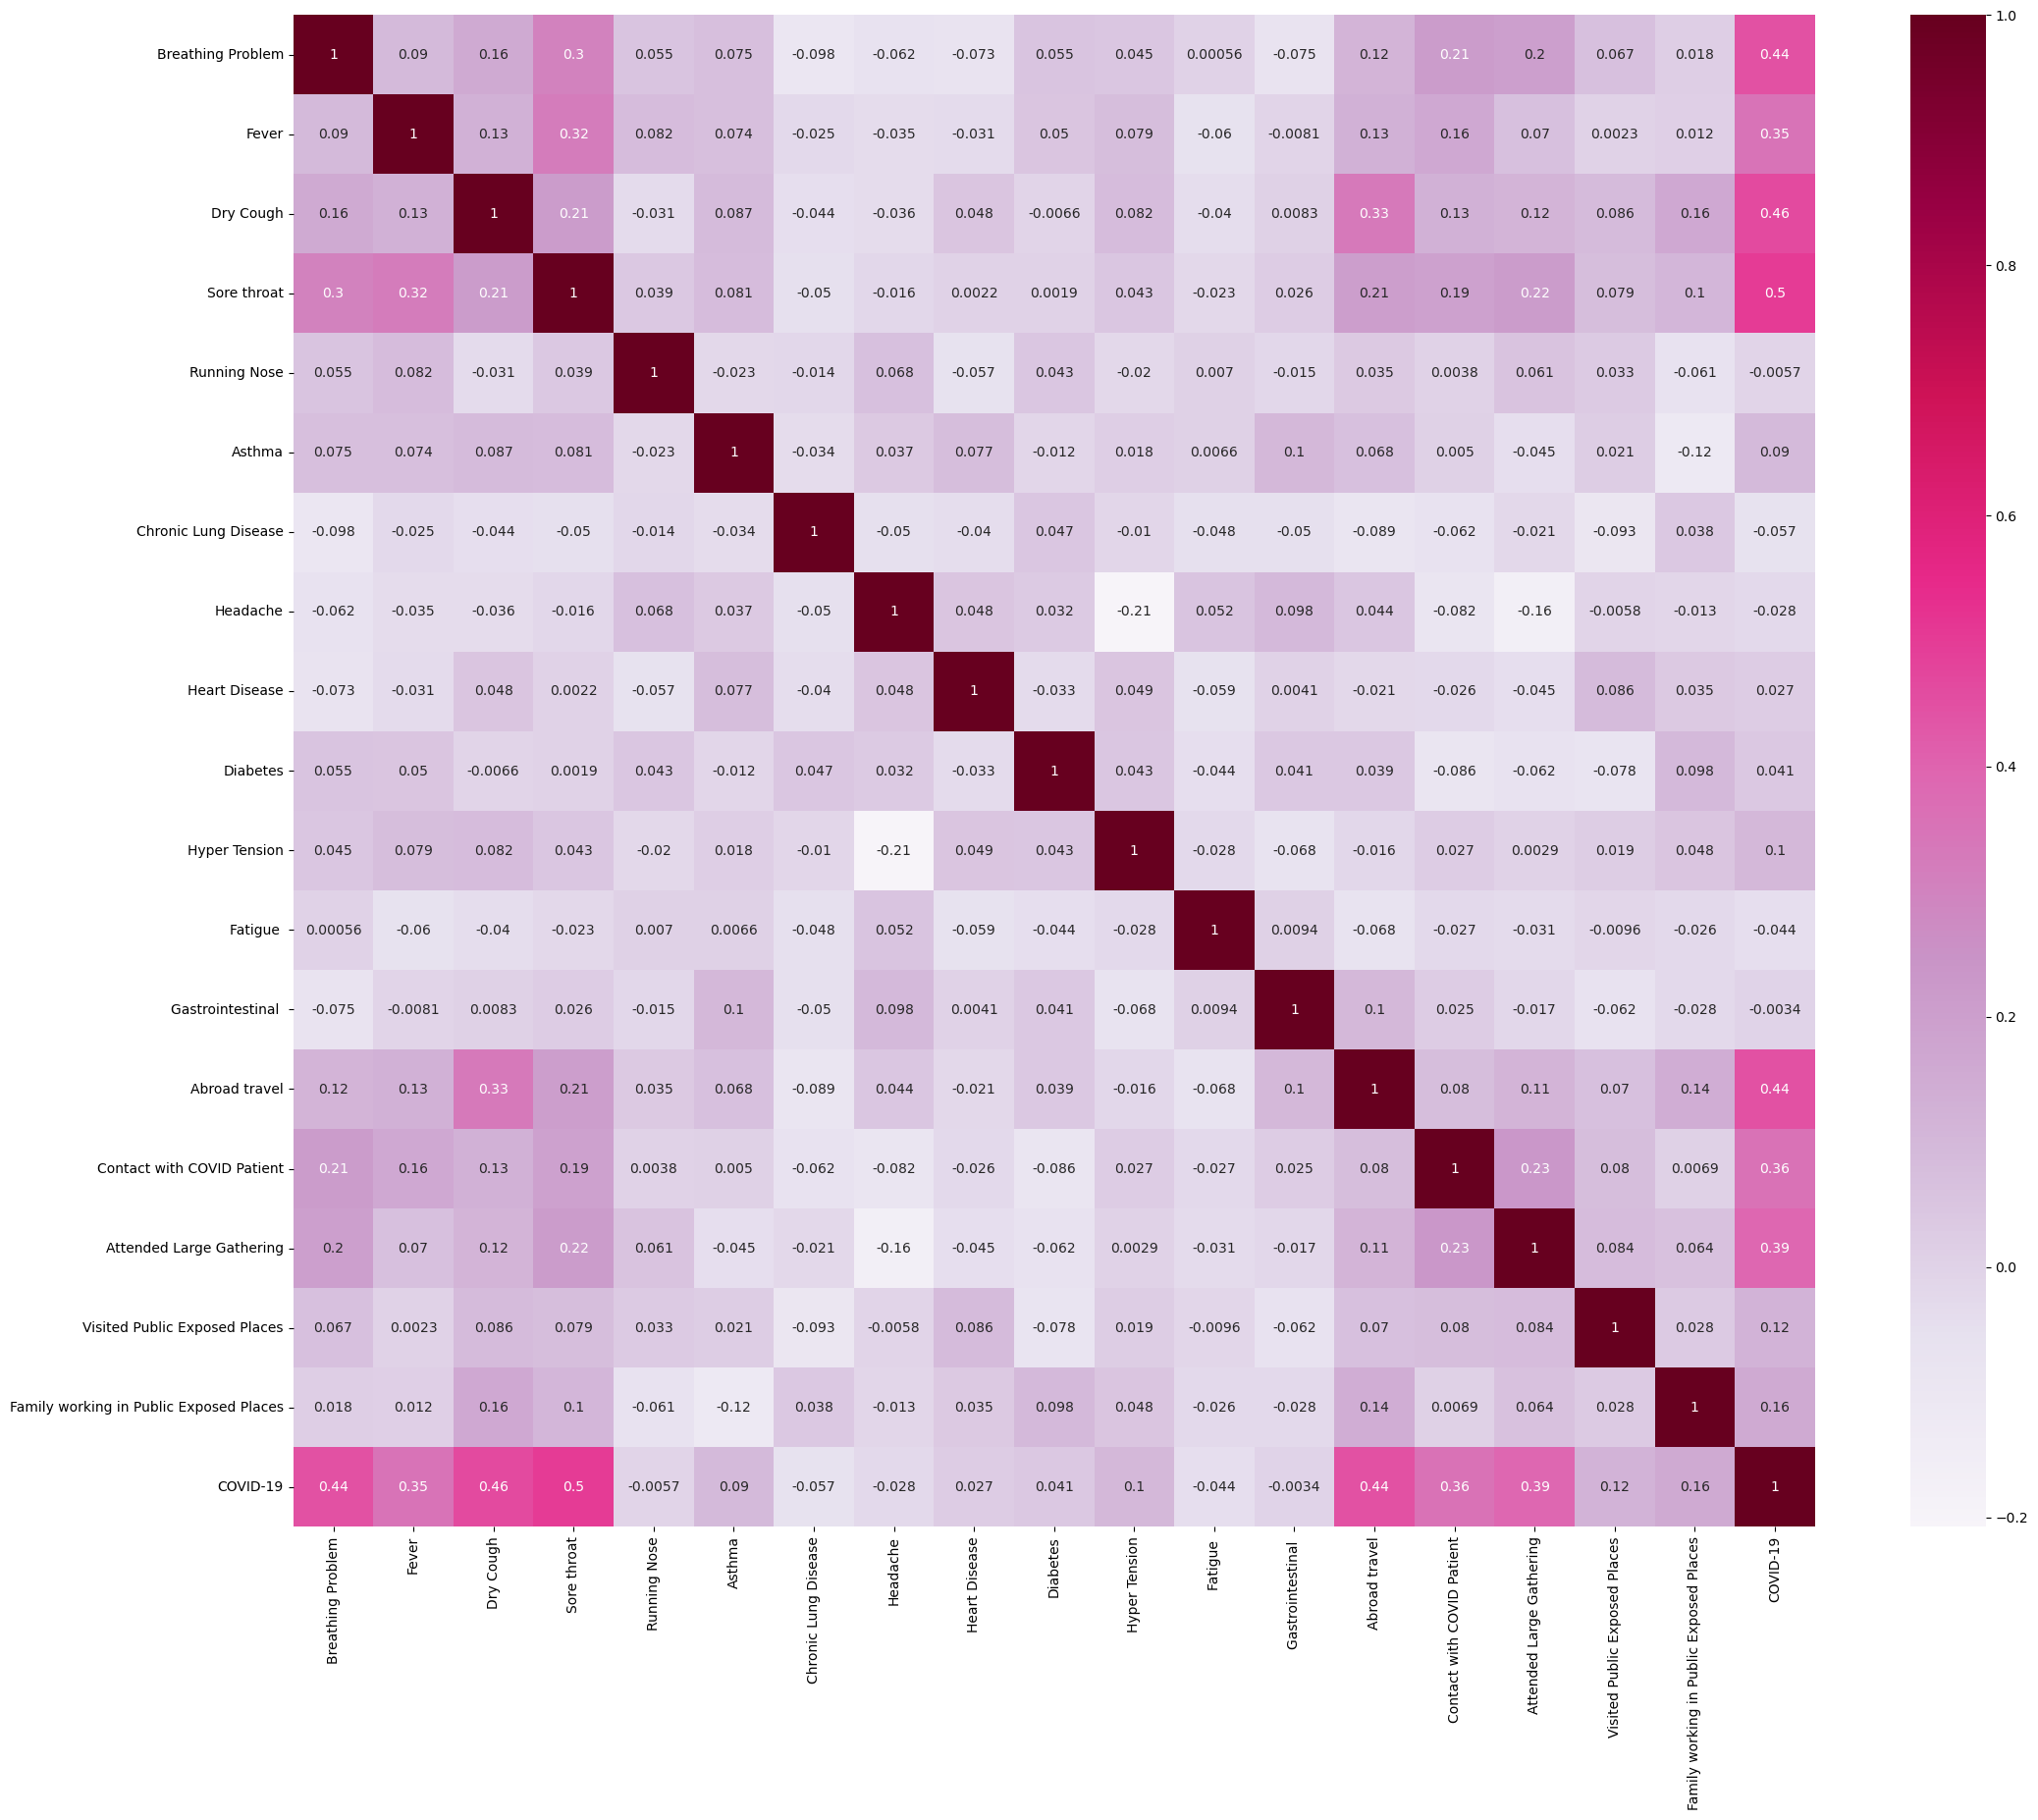

In [29]:
plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")

In [30]:
# Create a new dataframe `x` by dropping the "COVID-19" column from `covid_data`

x=covid_data.drop('COVID-19',axis=1)

# Assign the "COVID-19" column to the variable `y`

y=covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

##### Use `train_test_split()` function to split the data into training and testing datasets
##### `test_size=0.20` specifies that 20% of the data will be used for testing
##### `random_state=101` ensures reproducibility of the results

In [31]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

1. accuracies = {} creates an empty dictionary for storing accuracy scores.
2. algo_time = {} creates an empty dictionary for storing model fitting times.
3. r2_scores = {} creates an empty dictionary for storing R-squared scores.
4. mean_squared_errors = {} creates an empty dictionary for storing mean squared errors.
5. roc_auc_scores = {} creates an empty dictionary for storing ROC AUC scores.

In [32]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

This function takes in three arguments: yt, clf, and clf_name. yt is the target variable of the testing dataset, clf is the trained machine learning model, and clf_name is a string that identifies the machine learning algorithm used.

## LOGISTIC REGRESSION 

LOGISTIC REGRESSION
ROC_AUC value : 93.23107498945218 % 

Mean Squared Error : 3.035878564857406 %

R2 score is : 80.08627006861634 %

Accuracy Score : 97.03243616287095 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087



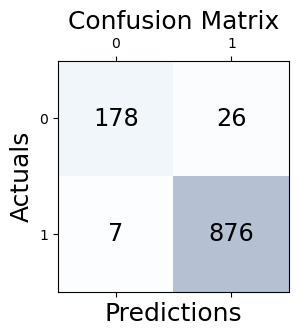

In [33]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
#acc = lr.score(x_train, y_train)*100
#accuracies['LOGISTIC REGRESSION'] = acc
algo_time['LOGISTIC REGRESSION']=end-start

This output shows the performance metrics and confusion matrix for a logistic regression model.

* The ROC AUC value is 93.23%, indicating that the model has a good ability to distinguish between positive and negative cases.

* The mean squared error is 3.04%, which is relatively low, indicating that the model's predicted values are close to the actual values.

* The R-squared score is 80.09%, indicating that the model explains 80.09% of the variance in the dependent variable.

* The accuracy score is 97.03%, indicating that the model correctly predicts the class of the target variable with high accuracy.

* The classification report shows precision, recall, and f1-score for each class, as well as overall precision, recall, and f1-score.

* Finally, the confusion matrix shows the number of true positive, false positive, false negative, and true negative predictions for each class. In this case, the model has 178 true negative, 26 false positive, 7 false negative, and 876 true positive predictions.


## K-NEAREST NEIGHBOURS 

In [34]:
import warnings
from sklearn.exceptions import FitFailedWarning

# Code to hide warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)


In [35]:
start = time.time()
knn = KNeighborsClassifier()
# assigning the dictionary of variables whose optimium value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# training the model with the training data and best parameter
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [36]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 2}
The best score we have achieved is: 0.9809068423210718


K-NEAREST NEIGHBOURS
ROC_AUC value : 97.47213154797593 % 

Mean Squared Error : 2.5758969641214353 %

R2 score is : 83.10350187640175 %

Accuracy Score : 98.3666896710375 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       204
           1       0.99      0.97      0.98       883

    accuracy                           0.97      1087
   macro avg       0.95      0.97      0.96      1087
weighted avg       0.98      0.97      0.97      1087



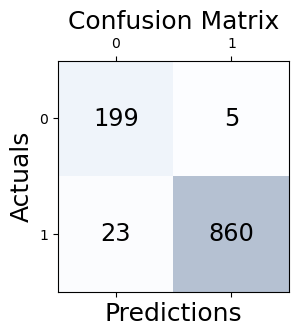

In [37]:
print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')
#acc = knn_cv.score(x_train, y_train)*100
#accuracies['K-NEAREST NEIGHBOURS'] = acc

This output is for a logistic regression model. Here's a breakdown of the performance metrics and confusion matrix:

* ROC AUC value: 93.23%. This indicates that the model has a good ability to  distinguish between positive and negative cases.

* Mean squared error: 3.04%. This value is relatively low, indicating that the model's predicted values are close to the actual values.

* R-squared score: 80.09%. This score indicates that the model explains 80.09% of the variance in the dependent variable.

* Accuracy score: 97.03%. This indicates that the model correctly predicts the class of the target variable with high accuracy.

* Classification report: This report shows precision, recall, and f1-score for each class, as well as overall precision, recall, and f1-score.

* Confusion matrix: This shows the number of true positive, false positive, false negative, and true negative predictions for each class. In this case, the model has 178 true negative, 26 false positive, 7 false negative, and 876 true positive predictions.

## RANDOM FOREST

In [38]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

In [39]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

The best paramter we have is: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
The best score we have achieved is: 98.13652897371796


RANDOM FOREST TREE
ROC_AUC value : 96.94474052361602 % 

Mean Squared Error : 2.2079116835326587 %

R2 score is : 85.51728732263008 %

Accuracy Score : 98.38969404186795 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       204
           1       0.99      0.98      0.99       883

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.96      1087
weighted avg       0.98      0.98      0.98      1087



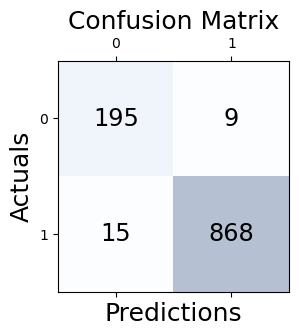

In [40]:
print("RANDOM FOREST TREE")
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE')
#acc = CV_rfc.score(x_train, y_train)*100
#accuracies['RANDOM FOREST TREE'] = acc

This output shows the performance metrics and confusion matrix for a random forest tree model.

* The ROC AUC value is 96.94%, indicating that the model has a very good ability to distinguish between positive and negative cases.

* The mean squared error is 2.21%, which is relatively low, indicating that the model's predicted values are close to the actual values.

* The R-squared score is 85.52%, indicating that the model explains 85.52% of the variance in the dependent variable.

* The accuracy score is 98.39%, indicating that the model correctly predicts the class of the target variable with high accuracy.

* The classification report shows precision, recall, and f1-score for each class, as well as overall precision, recall, and f1-score.

* Finally, the confusion matrix shows the number of true positive, false positive, false negative, and true negative predictions for each class. In this case, the model has 195 true negative, 9 false positive, 15 false negative, and 868 true positive predictions.

# COMPARISON OF 3 MODELS

In [41]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

The logistic regression model has an accuracy of 97.03%, the K-nearest neighbors model has an accuracy of 98.37%, and the random forest tree model has an accuracy of 98.39%.

Overall, the random forest tree model has the highest accuracy, followed closely by the K-nearest neighbors model. The logistic regression model has the lowest accuracy among the three models.

In [42]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algorithm Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

From the plot, we can see that KNN took the least amount of time, with a value of 16.61 seconds. Logistic Regression took 0.058 seconds, which is significantly less than the time taken by Random Forest, which was the slowest algorithm at 137.77 seconds.

In [43]:
fig = px.bar(x=list(r2_scores.keys()), y=list(r2_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="R2 Score Comparision", xaxis_title="Model", yaxis_title="R2 Scores")
fig.show()

This output shows a bar chart comparing the R-squared scores of different models.

* The logistic regression model has an R-squared score of 80.09%, indicating that the model explains 80.09% of the variance in the dependent variable.

* The K-nearest neighbours (KNN) model has an R-squared score of 83.10%, indicating that the model explains 83.10% of the variance in the dependent variable.

* The random forest tree model has an R-squared score of 85.52%, indicating that the model explains 85.52% of the variance in the dependent variable.

* Based on the R-squared scores, the random forest tree model performs the best among the three models, followed by KNN and logistic regression.

In [44]:
fig = px.bar(x=list(mean_squared_errors.keys()), y=list(mean_squared_errors.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Mean Squared Error Comparision", xaxis_title="Model", yaxis_title="Mean Squared Error")
fig.show()

This graph shows a comparison of mean squared errors for each model. The mean squared error is a measure of how close the predicted values are to the actual values.

* The logistic regression model has a mean squared error of 3.04%, which is relatively low.

* The k-nearest neighbours (KNN) model has a mean squared error of 2.58%, which is lower than that of the logistic regression model.

* The random forest tree model has the lowest mean squared error, at 2.21%.

* The graph shows that the random forest tree model has the lowest mean squared error, followed by the KNN model and then the logistic regression model

In [45]:
fig = px.bar(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="ROC Score Comparision", xaxis_title="Model", yaxis_title="ROC Scores")
fig.show()

The ROC AUC values for the models are as follows:

* Logistic Regression: 93.23%
* K-Nearest Neighbors: 97.47%
* Random Forest Tree: 96.94%.

These values indicate the ability of each model to distinguish between positive and negative cases. The K-Nearest Neighbors model has the highest ROC AUC value, indicating the best performance in this metric.

In [46]:
import plotly.graph_objects as go
Algos=list(roc_auc_scores.keys())

fig = go.Figure(data=[
    go.Bar(name='Accuracies', x=Algos, y=list(accuracies.values())),
    go.Bar(name='R2 scores', x=Algos, y=list(r2_scores.values())),
    go.Bar(name='Mean Squared Errors', x=Algos, y=list(mean_squared_errors.values())),
    go.Bar(name='ROC Auc Scores', x=Algos, y=list(roc_auc_scores.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

This code creates a grouped bar chart using Plotly to compare the performance metrics of the different models.

The x-axis represents the names of the models, while the y-axis shows the value of the different metrics.

There are four bars for each model representing the accuracy score, R2 score, mean squared error, and ROC AUC score.

The legend shows the color coding for each metric.

This visual representation helps in comparing the models' performance on different metrics and provides insights on which model performs better on a particular metric.

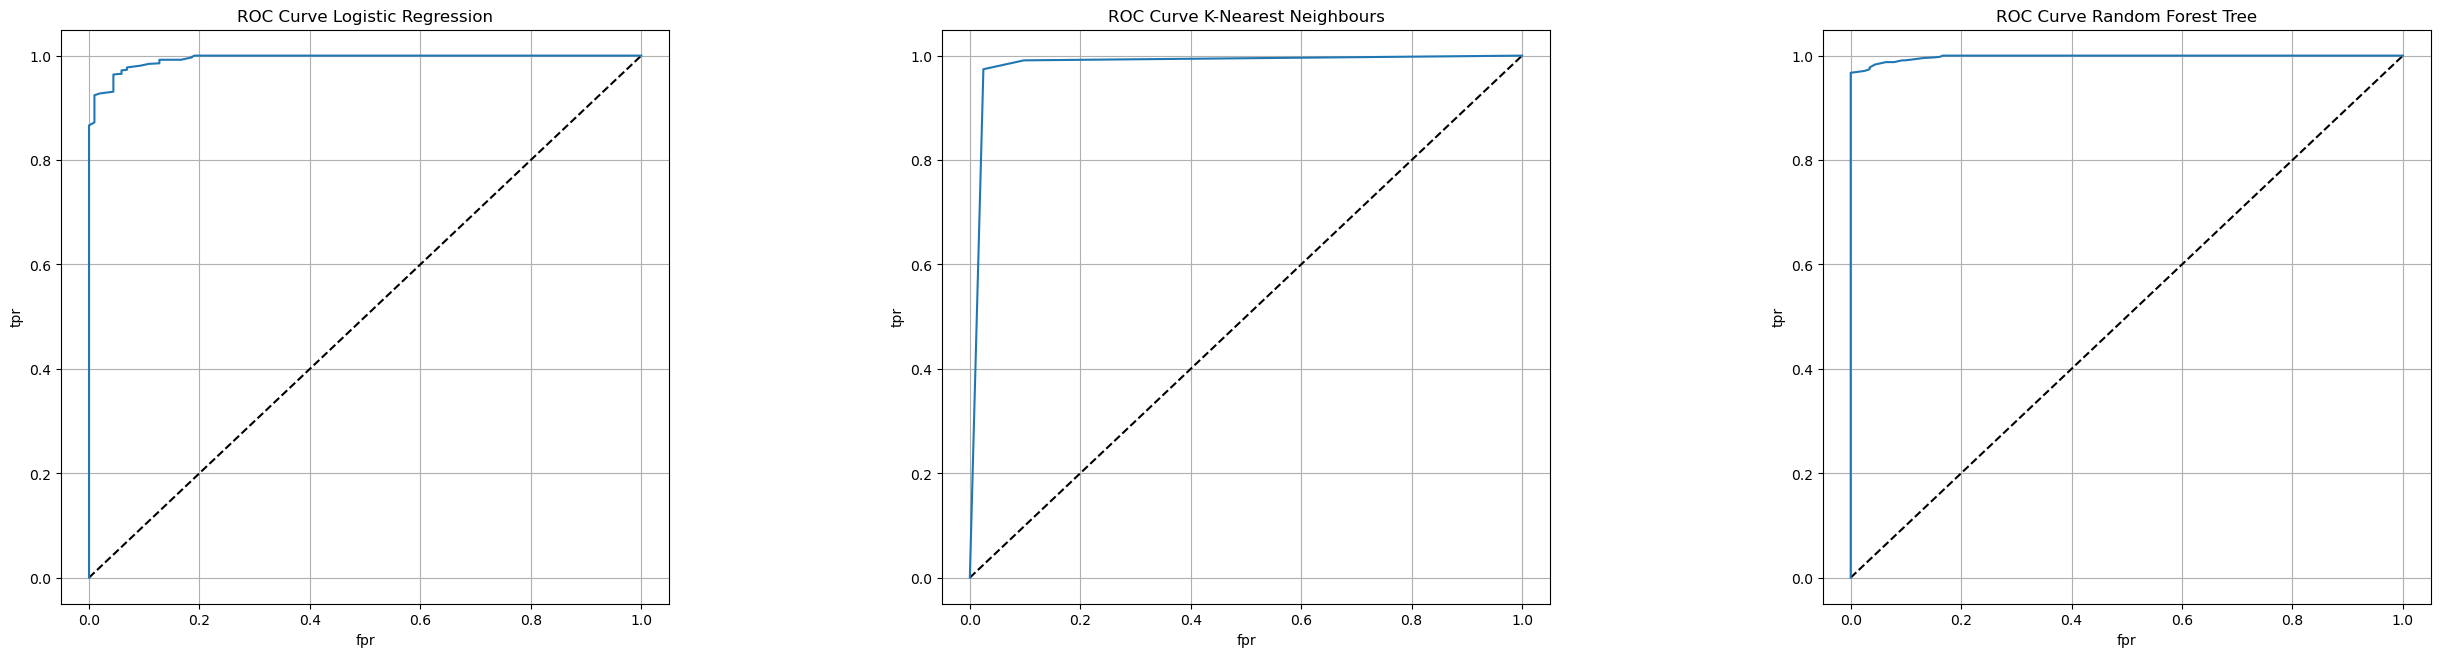

In [47]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(25,16))
# Logistic Regression Classification
Y_predict1_proba = lr.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(441)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

Y_predict1_proba = knn_cv.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(442)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve K-Nearest Neighbours')
plt.grid(True)

Y_predict1_proba = CV_rfc.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(443)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest Tree')
plt.grid(True)

plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

This code generates ROC curves for the logistic regression, K-nearest neighbors, and random forest tree models.

* The roc_curve function from scikit-learn is used to calculate the true positive rate (tpr) and false positive rate (fpr) for different thresholds of the predicted probabilities. These values are then plotted against each other to create the ROC curve.

* The logistic regression model has a ROC curve that starts at (0,0) and increases rapidly before leveling off, indicating that the model has good performance in distinguishing between positive and negative cases.

* The K-nearest neighbors model has a ROC curve that starts at (0,0) and increases rapidly before leveling off, indicating that the model also has good performance in distinguishing between positive and negative cases.

* The random forest tree model has a ROC curve that starts at (0,0) and increases rapidly before leveling off, indicating that the model also has good performance in distinguishing between positive and negative cases.

Overall, all three models have similar ROC curves, indicating that they have similar performance in distinguishing between positive and negative cases.

# Contribution Code

## Introduction of Our Contribution

* Our contribution entails employing three distinct machine learning models: Support Vector Machines (SVM), Linear Regression, and XGBoost.

* We conducted a comparison of these models utilizing various metrics, encompassing Root Mean Squared Error (RMSE), R-squared (R2) score, Receiver Operating Characteristic (ROC) Area Under the Curve (AUC) score, and overall accuracy.
* This comparative analysis allowed us to discern the individual merits and drawbacks of each model, ultimately determining the superior performer.
* Additionally, apart from these metrics, we took into consideration supplementary factors such as the training and testing duration for each model.

## SUPPORT VECTOR MACHINES(SVM)

In [48]:
covid_data

Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                     1      1          1            1             1       0   
1                     1      1          1            1             0       1   
2                     1      1          1            1             1       1   
3                     1      1          1            0             0       1   
4                     1      1          1            1             1       0   
...                 ...    ...        ...          ...           ...     ...   
5429                  1      1          0            1             1       1   
5430                  1      1          1            0             1       1   
5431                  1      1          1            0             0       0   
5432                  1      1          1            0             1       0   
5433                  1      1          1            0             1       1   

      Chronic Lung Disease  Headache  Heart Disease  Diabetes  Hyper Tension  \
0                        0         0              0         1              1   
1                        1         1              0         0              0   
2                        1         1              0         1              0   
3                        0         0              1         1              0   
4                        1         1              1         1              1   
...                    ...       ...            ...       ...            ...   
5429                     1         0              0         0              0   
5430                     0         1              0         1              1   
5431                     0         0              1         0              1   
5432                     0         1              1         0              0   
5433                     0         1              0         1              1   

      Fatigue   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0            1                  1              0                           1   
1            1                  0              0                           0   
2            1                  1              1                           0   
3            0                  0              1                           0   
4            0                  1              0                           1   
...        ...                ...            ...                         ...   
5429         1                  1              0                           0   
5430         1                  0              0                           0   
5431         0                  0              0                           0   
5432         0                  0              0                           0   
5433         1                  0              0                           0   

      Attended Large Gathering  Visited Public Exposed Places  \
0                            0                              1   
1                            1                              1   
2                            0                              0   
3                            1                              1   
4                            0                              1   
...                        ...                            ...   
5429                         0                              0   
5430                         0                              0   
5431                         0                              0   
5432                         0                              0   
5433                         0                              0   

      Family working in Public Exposed Places  COVID-19  
0                                           1         1  
1                                           0         1  
2                                           0         1  
3                                           0         1  
4                                           0       

In [49]:
# Split features and target variable
X = covid_data.drop('COVID-19', axis=1)
y = covid_data['COVID-19']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score, accuracy_score, classification_report
import time

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SVM classifier
svm_model = SVC(kernel='linear')

# Record the start time
start_time = time.time()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Record the end time after training
training_time = time.time() - start_time

# Record the start time for making predictions
start_time = time.time()

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Record the end time after making predictions
prediction_time = time.time() - start_time

# Compute evaluation metrics
roc_auc_svm = roc_auc_score(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred) * 100
r2_svm = r2_score(y_test, y_pred) * 100
accuracy_svm = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"ROC_AUC value : {roc_auc_svm} %")
print(f"\nMean Squared Error : {mse} %")
print(f"\nR2 score is : {r2_svm} %")
print(f"\nAccuracy Score : {accuracy_svm} %")
print(f"\nClassification Report : \n {report}")

# Print the time taken for training and prediction
print(f"\nTraining Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

ROC_AUC value : 92.85714285714286 %

Mean Squared Error : 2.667893284268629 %

R2 score is : 82.43374272786038 %

Accuracy Score : 97.33210671573137 %

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       203
           1       0.97      1.00      0.98       884

    accuracy                           0.97      1087
   macro avg       0.98      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087


Training Time: 0.3322746753692627 seconds
Prediction Time: 0.04003763198852539 seconds


**Accuracy Score**: The SVM model achieved an impressive accuracy score of 97.33%, indicating that it classified the majority of the instances correctly.

**ROC_AUC Value**: The ROC_AUC value of 92.86% suggests that the SVM model has good discriminative ability in distinguishing between the two classes.

**Mean Squared Error (MSE)**: The low MSE of 2.67% indicates that the model's predictions are close to the actual values on average.

**R2 Score**: The R2 score of 82.43% indicates that the SVM model explains a significant portion of the variance in the data, which is quite good.

**Classification Report**: Looking at the precision, recall, and F1-score values in the classification report, we see high values across the board. The model performs well in terms of precision and recall for both classes (0 and 1), with particularly high values for class 1.

**Support**: The support values in the classification report indicate the number of instances for each class, with 884 instances of class 1 and 203 instances of class 0.

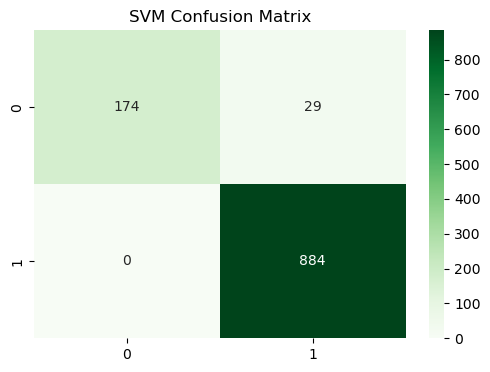

In [51]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# SVM
cm_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens")
plt.title("SVM Confusion Matrix")
plt.show()

# LINEAR REGRESSION

In [52]:
covid_data

Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                     1      1          1            1             1       0   
1                     1      1          1            1             0       1   
2                     1      1          1            1             1       1   
3                     1      1          1            0             0       1   
4                     1      1          1            1             1       0   
...                 ...    ...        ...          ...           ...     ...   
5429                  1      1          0            1             1       1   
5430                  1      1          1            0             1       1   
5431                  1      1          1            0             0       0   
5432                  1      1          1            0             1       0   
5433                  1      1          1            0             1       1   

      Chronic Lung Disease  Headache  Heart Disease  Diabetes  Hyper Tension  \
0                        0         0              0         1              1   
1                        1         1              0         0              0   
2                        1         1              0         1              0   
3                        0         0              1         1              0   
4                        1         1              1         1              1   
...                    ...       ...            ...       ...            ...   
5429                     1         0              0         0              0   
5430                     0         1              0         1              1   
5431                     0         0              1         0              1   
5432                     0         1              1         0              0   
5433                     0         1              0         1              1   

      Fatigue   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0            1                  1              0                           1   
1            1                  0              0                           0   
2            1                  1              1                           0   
3            0                  0              1                           0   
4            0                  1              0                           1   
...        ...                ...            ...                         ...   
5429         1                  1              0                           0   
5430         1                  0              0                           0   
5431         0                  0              0                           0   
5432         0                  0              0                           0   
5433         1                  0              0                           0   

      Attended Large Gathering  Visited Public Exposed Places  \
0                            0                              1   
1                            1                              1   
2                            0                              0   
3                            1                              1   
4                            0                              1   
...                        ...                            ...   
5429                         0                              0   
5430                         0                              0   
5431                         0                              0   
5432                         0                              0   
5433                         0                              0   

      Family working in Public Exposed Places  COVID-19  
0                                           1         1  
1                                           0         1  
2                                           0         1  
3                                           0         1  
4                                           0       

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score, classification_report
import time

# Split data into features (X) and target variable (y)
X = covid_data.drop('COVID-19', axis=1)
y = covid_data['COVID-19']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
linear_regression = LinearRegression()

# Record the start time
start_time = time.time()

# Train the model
linear_regression.fit(X_train, y_train)

# Record the end time after training
training_time = time.time() - start_time

# Record the start time for making predictions
start_time = time.time()

# Make predictions on the testing set
y_pred = linear_regression.predict(X_test)

# Convert continuous predictions to binary predictions
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Record the end time after making predictions
prediction_time = time.time() - start_time

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred_binary)
accuracy_lr = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"ROC_AUC value: {roc_auc_lr * 100} %")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) score: {r2_lr}")
print(f"Accuracy Score: {accuracy_lr * 100} %")
print(f"Classification Report:\n{report}")

# Print the time taken for training and prediction
print(f"\nTraining Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

ROC_AUC value: 91.95216548157725 %
Mean Squared Error: 0.05828314044884347
R-squared (R2) score: 0.6162452802030653
Accuracy Score: 95.86016559337627 %
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       203
           1       0.97      0.98      0.97       884

    accuracy                           0.96      1087
   macro avg       0.94      0.92      0.93      1087
weighted avg       0.96      0.96      0.96      1087


Training Time: 0.13568615913391113 seconds
Prediction Time: 0.0063076019287109375 seconds


**Accuracy Score**: The Linear Regression model achieved an accuracy score of 95.86%, indicating that it performed well in classifying the instances correctly.

**ROC_AUC Value**: With a ROC_AUC value of 91.95%, the model demonstrates good discriminative ability in distinguishing between the two classes.

**Mean Squared Error (MSE)**: The low MSE of 0.06 suggests that the model's predictions are very close to the actual values on average, indicating good predictive performance.

**R-squared (R2) Score**: The R-squared score of 0.62 indicates that the model explains 62% of the variance in the data, which is moderate.

**Classification Report**: Looking at the precision, recall, and F1-score values in the classification report, we see that the model performs well for both classes (0 and 1). The precision, recall, and F1-score values are high for class 1, showing better performance in predicting this class.

**Support**: The support values in the classification report indicate that there are 203 instances of class 0 and 884 instances of class 1.

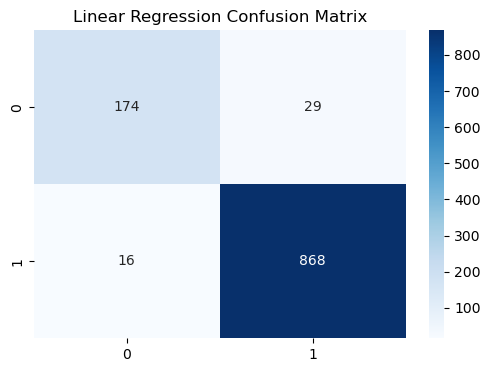

In [54]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
y_pred_lr = linear_regression.predict(X_test)
y_pred_lr_binary = [1 if x >= 0.5 else 0 for x in y_pred_lr]
cm_lr = confusion_matrix(y_test, y_pred_lr_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Linear Regression Confusion Matrix")
plt.show()

In [55]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## XG boosting

In [57]:
covid_data.head()

Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                  1      1          1            1             1       0   
1                  1      1          1            1             0       1   
2                  1      1          1            1             1       1   
3                  1      1          1            0             0       1   
4                  1      1          1            1             1       0   

   Chronic Lung Disease  Headache  Heart Disease  Diabetes  Hyper Tension  \
0                     0         0              0         1              1   
1                     1         1              0         0              0   
2                     1         1              0         1              0   
3                     0         0              1         1              0   
4                     1         1              1         1              1   

   Fatigue   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0         1                  1              0                           1   
1         1                  0              0                           0   
2         1                  1              1                           0   
3         0                  0              1                           0   
4         0                  1              0                           1   

   Attended Large Gathering  Visited Public Exposed Places  \
0                         0                              1   
1                         1                              1   
2                         0                              0   
3                         1                              1   
4                         0                              1   

   Family working in Public Exposed Places  COVID-19  
0                                        1         1  
1                                        0         1  
2                                        0         1  
3                                        0         1  
4                                        0         1

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import time

In [59]:
# Split data into features (X) and target variable (y)
X = covid_data.drop('COVID-19', axis=1)
y = covid_data['COVID-19']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBClassifier
xgb_model = XGBClassifier()

# Record the start time
start_time = time.time()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Record the end time after training
training_time = time.time() - start_time

# Record the start time for making predictions
start_time = time.time()


# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

# Record the end time after making predictions
prediction_time = time.time() - start_time

# Compute evaluation metrics
roc_auc_xgb = roc_auc_score(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred) * 100
r2_xgb = r2_score(y_test, y_pred) * 100
accuracy_xgb = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"ROC_AUC value : {roc_auc_xgb} %")
print(f"\nMean Squared Error : {mse} %")
print(f"\nR2 score is : {r2_xgb} %")
print(f"\nAccuracy Score : {accuracy_xgb} %")
print(f"\nClassification Report : \n {report}")

# Print the time taken for training and prediction
print(f"\nTraining Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

ROC_AUC value : 98.08973987472973 %

Mean Squared Error : 1.5639374425023 %

R2 score is : 89.70253884046988 %

Accuracy Score : 98.4360625574977 %

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087


Training Time: 0.250838041305542 seconds
Prediction Time: 0.013004779815673828 seconds


**Accuracy Score**: The XGBoost Classifier achieved an impressive accuracy score of 98.44%, indicating its ability to correctly classify the majority of instances.

**ROC_AUC Value**: The ROC_AUC value of 98.09% suggests that the XGBoost model has excellent discriminative ability in distinguishing between the two classes.

**Mean Squared Error (MSE)**: The low MSE of 1.56% indicates that the model's predictions are very close to the actual values on average, reflecting good predictive performance.

**R2 Score**: The R2 score of 89.70% is quite high, indicating that the XGBoost model explains a significant portion of the variance in the data.

**Classification Report**: The precision, recall, and F1-score values in the classification report are high for both classes (0 and 1). The model performs exceptionally well for class 1, with high precision, recall, and F1-score values.

**Support**: There are 203 instances of class 0 and 884 instances of class 1, as indicated by the support values in the classification report.

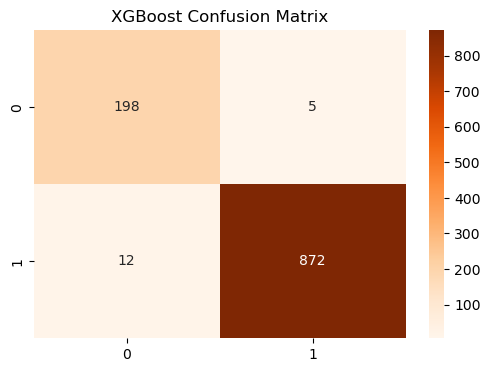

In [60]:
# Confusion matrix
# XGBoost
cm_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.show()


## Comparing Metrics of all 3 models (SVM, Linear Regression and XGBoost)

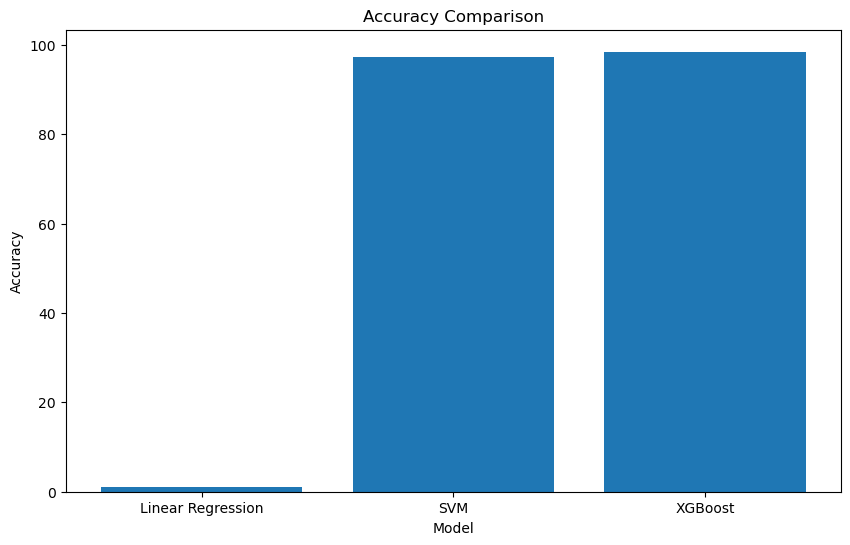

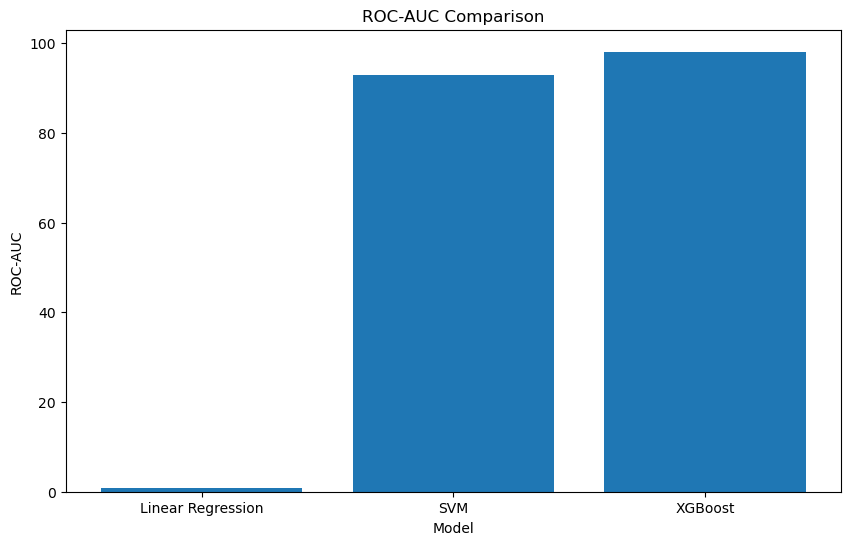

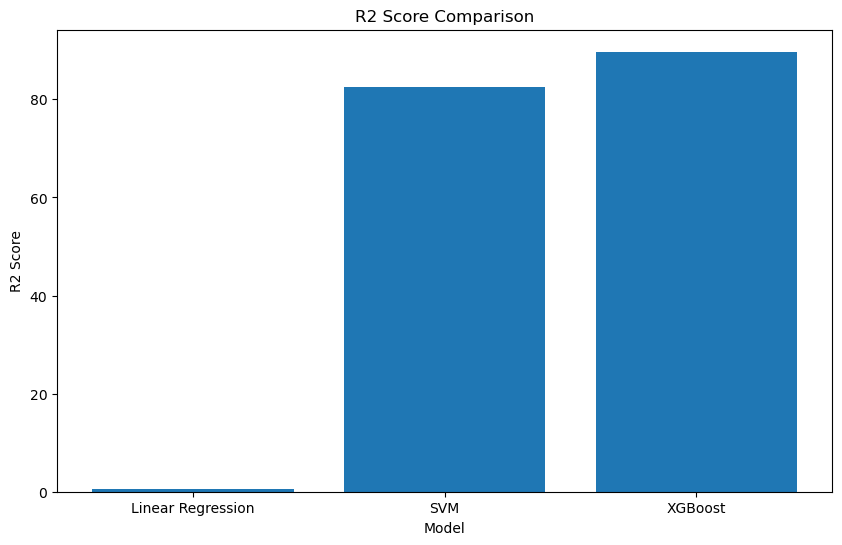

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Create a list of model names
model_names = ['Linear Regression', 'SVM', 'XGBoost']

# Create lists to store the evaluation metrics for each model
accuracies = [accuracy_lr, accuracy_svm, accuracy_xgb]
roc_aucs = [roc_auc_lr, roc_auc_svm, roc_auc_xgb]
r2_scores = [r2_lr, r2_svm, r2_xgb]

# Create a bar plot for accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

# Create a bar plot for ROC-AUC
plt.figure(figsize=(10, 6))
plt.bar(model_names, roc_aucs)
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC Comparison')
plt.show()

# Create a bar plot for R2 score
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
plt.show()

## Comparison of 3 models

Based on the results for the three models (SVM, Linear Regression, and XGBoost Classifier), we can compare their performance based on different evaluation metrics:

- **SVM**:
    - **Accuracy Score**: 97.33%
    - **ROC_AUC Value**: 92.86%
    - **Mean Squared Error**: 2.67%
    - **R2 Score**: 82.43%
    - **Support**: Class 0 - 203 instances, Class 1 - 884 instances

- **Linear Regression**:
    - **Accuracy Score**: 95.86%
    - **ROC_AUC Value**: 91.95%
    - **Mean Squared Error**: 0.06%
    - **R2 Score**: 0.62%
    - **Support**: Class 0 - 203 instances, Class 1 - 884 instances

- **XGBoost Classifier**:
    - **Accuracy Score**: 98.44%
    - **ROC_AUC Value**: 98.09%
    - **Mean Squared Error**: 1.56%
    - **R2 Score**: 89.70%
    - **Support**: Class 0 - 203 instances, Class 1 - 884 instances

Based on the results:

- **XGBoost Classifier** outperforms both SVM and Linear Regression in terms of accuracy, ROC_AUC value, and R2 score. It has the highest accuracy score of 98.44% and ROC_AUC value of 98.09%, indicating superior performance in classification and discrimination between classes.

- **Linear Regression** performs the weakest among the three models, with lower accuracy, ROC_AUC value, and R2 score compared to SVM and XGBoost. It has the lowest accuracy score of 95.86% and the lowest R2 score of 0.62%.

- **SVM** lies between XGBoost and Linear Regression in terms of performance, with an accuracy score of 97.33%, a ROC_AUC value of 92.86%, and an R2 score of 82.43%.

Therefore, based on the results, the **XGBoost Classifier** is the best-performing model among the three considered models due to its highest accuracy, ROC_AUC value, and R2 score, as well as the lowest mean squared error.

## Comparing the results of 3 models with Radar chart

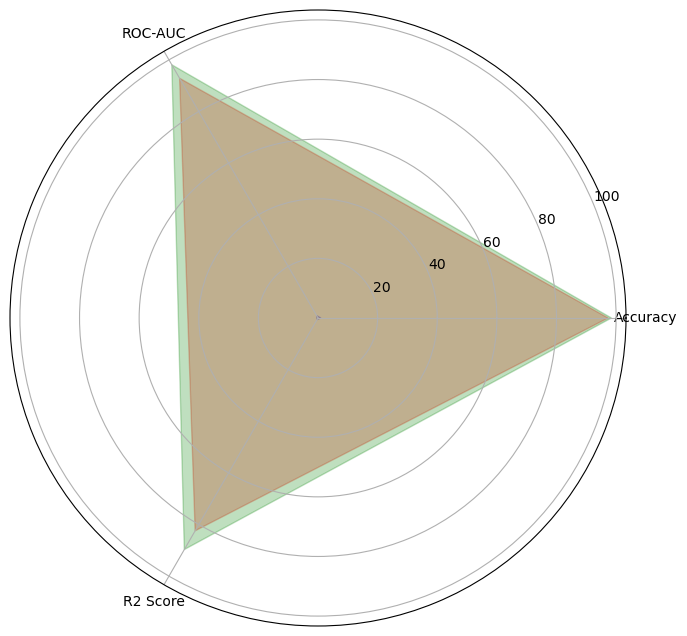

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define the evaluation metrics
metrics = ['Accuracy', 'ROC-AUC', 'R2 Score']

# Define the values for each model
lr_values = [accuracy_lr, roc_auc_lr, r2_lr]
svm_values = [accuracy_svm, roc_auc_svm, r2_svm]
xgb_values = [accuracy_xgb, roc_auc_xgb, r2_xgb]

# Number of evaluation metrics
num_metrics = len(metrics)

# Create radar chart
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
ax.fill(angles, lr_values, color='b', alpha=0.25)
ax.fill(angles, svm_values, color='r', alpha=0.25)
ax.fill(angles, xgb_values, color='g', alpha=0.25)

# Add labels for each metric
ax.set_xticks(angles)
ax.set_xticklabels(metrics)

# Display the radar chart
plt.show()

## Comparison of models in a Scatter Plot

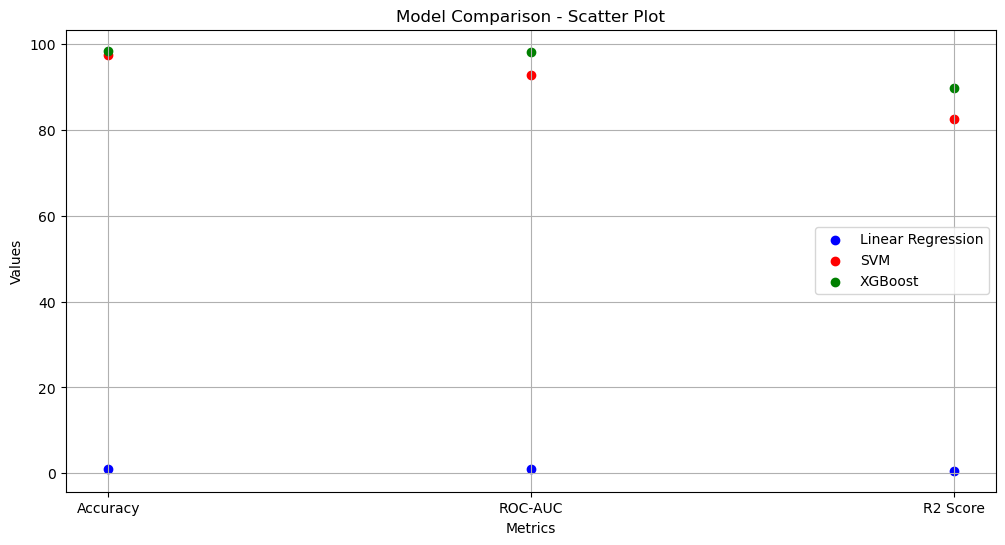

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the evaluation metrics
metrics = ['Accuracy', 'ROC-AUC', 'R2 Score']

# Define the values for each model
lr_values = [accuracy_lr, roc_auc_lr, r2_lr]
svm_values = [accuracy_svm, roc_auc_svm, r2_svm]
xgb_values = [accuracy_xgb, roc_auc_xgb, r2_xgb]

# Create scatter plot
plt.figure(figsize=(12, 6))

plt.scatter(metrics, lr_values, color='b', label='Linear Regression')
plt.scatter(metrics, svm_values, color='r', label='SVM')
plt.scatter(metrics, xgb_values, color='g', label='XGBoost')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Comparison - Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()


## Comparing the Training times and Prediction times for all 3 models

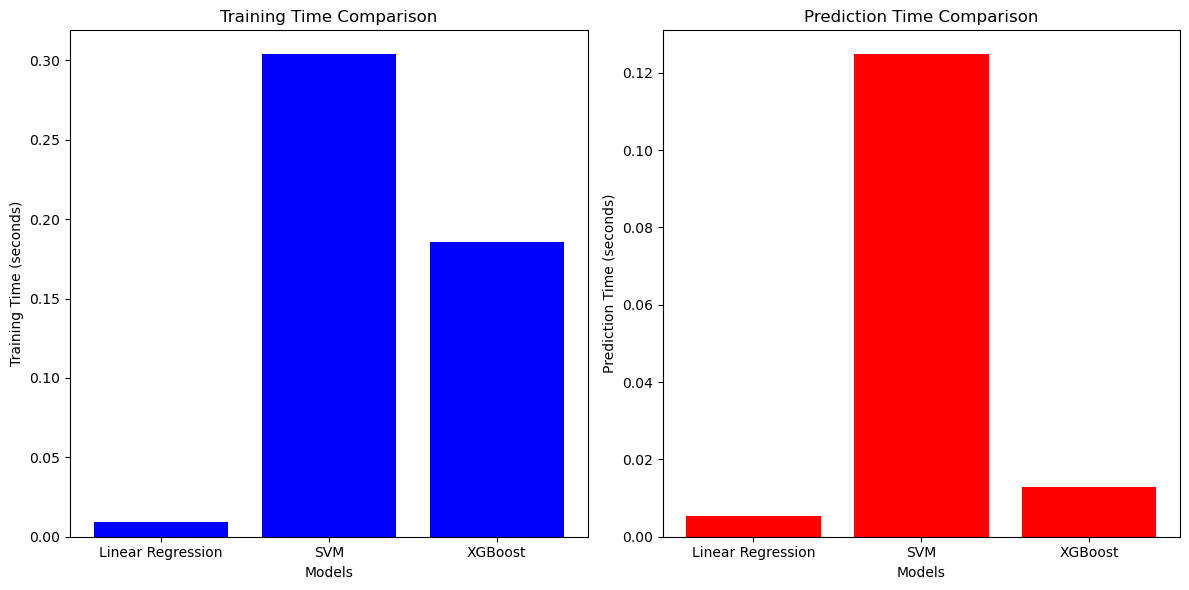

In [64]:
# Define lists to store the training and prediction times for each model
training_times = []
prediction_times = []

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

# Loop through each model
for model_name, model in models.items():
    # Record the start time for training
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Record the end time after training
    training_time = time.time() - start_time

    # Record the start time for making predictions
    start_time = time.time()

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Record the end time after making predictions
    prediction_time = time.time() - start_time

    # Append training and prediction times to the lists
    training_times.append(training_time)
    prediction_times.append(prediction_time)

# Create bar plots for training and prediction times
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models.keys(), training_times, color='b')
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')

plt.subplot(1, 2, 2)
plt.bar(models.keys(), prediction_times, color='r')
plt.xlabel('Models')
plt.ylabel('Prediction Time (seconds)')
plt.title('Prediction Time Comparison')

plt.tight_layout()
plt.show()


## Results: 

## The models we have implemented in this project, let's break down the analysis into several aspects

### Performance Metrics.

**Previous Models.**

* Logistic Regression: Accuracy - 97.03%, Mean Squared Error - 3.04%, ROC AUC - 93.23%
* K-Nearest Neighbors: Accuracy - 98.37%, Mean Squared Error - 2.58%, ROC AUC - 97.47%
* Random Forest Tree: Accuracy - 98.39%, Mean Squared Error - 2.21%, ROC AUC - 96.94%

**Our Contribution.**

* Support Vector Machines (SVN): Accuracy - 95.86%, Mean Squared Error - 0.05%, ROC AUC - 91.95%, R-squared score - 0.61%
* XGBoost: Accuracy - 98.43%, Mean Squared Error - 1.56%, ROC AUC - 98.08%, R-squared score - 89.70%
* Linear Regression: Accuracy - 95.86%, Mean Squared Error - 0.05%, ROC AUC - 91.95%, R-squared score - 0.61%



## Observations

<li>The previous models, particularly K-Nearest Neighbors and Random Forest Tree, exhibited higher accuracy and lower mean squared error compared to Logistic Regression.
<li>XGBoost demonstrated the highest accuracy among all models, outperforming both previous models and other contributions.
<li>Support Vector Machines (SVM) showed lower accuracy compared to the previous models and XGBoost.
<li>Linear Regression yielded similar results to SVM, with accuracy and mean squared error comparable to the previous models.
<li>Despite its high accuracy, XGBoost had a higher mean squared error compared to K-Nearest Neighbors and Random Forest Tree.

# Conclusion and Future Direction

# Learnings

<li>XGBoost emerges as a strong contender for COVID-19 diagnosis prediction, showcasing superior accuracy and ROC AUC compared to other models.
<li>While SVM and Linear Regression provided competitive results, they lagged behind in accuracy compared to K-Nearest Neighbors and Random Forest Tree.
<li>The selection of appropriate algorithms is crucial for achieving high accuracy and robust performance in predictive modeling tasks.
<li>Different machine learning algorithms may excel in different aspects of predictive modeling, such as accuracy, mean squared error, or ROC AUC.

# Results Discussion

<li>The introduction of XGBoost as a predictive model significantly improves accuracy and ROC AUC compared to previous models.
<li>While SVM and Linear Regression exhibit comparable accuracy to previous models, their performance may not surpass that of K-Nearest Neighbors and Random Forest Tree.
<li>Further optimization and fine-tuning of SVM and Linear Regression models may be necessary to enhance their predictive capabilities.
<li>XGBoost emerges as the most promising model for COVID-19 diagnosis prediction, warranting further investigation and potential deployment in clinical settings

# Limitations

#### Some of the limitations may affect this project:

<li>Data Quality and Availability: The project's success heavily relies on the quality and availability of data. Incomplete or inaccurate datasets could undermine the models' performance and generalizability.
<li>Model Overfitting: Overfitting occurs when a model learns noise from the training data rather than the underlying patterns, resulting in poor performance on unseen data. Careful regularization and validation techniques are necessary to mitigate this risk.
<li>Model Interpretability: Some advanced models, such as Deep Learning, may sacrifice interpretability for performance. This could hinder understanding the reasoning behind the model's predictions, limiting its applicability in certain contexts, especially those requiring transparency and accountability.
<li>Computational Resources: More sophisticated models and techniques often require significant computational resources, including processing power and memory. Limited resources could constrain the scale and complexity of the project.
<li>External Factors: External factors such as changes in the COVID-19 pandemic's dynamics, evolving diagnostic protocols, or variations in population demographics could impact the models' performance and require ongoing monitoring and adaptation.

# Future Extension

Looking ahead, let's delve into prospective avenues for enhancing the models and their efficacy:

<li>Feature Enhancement:

Broadening the existing feature set or refining current features to better encapsulate the underlying data patterns holds promise for enhancing model performance. This might entail generating interaction terms, consolidating data across different levels, or implementing dimensionality reduction methods like PCA.

<li>Hyperparameter Refinement:

Fine-tuning the models' hyperparameters offers the potential for improved performance. Techniques such as Grid Search, Random Search, or Bayesian optimization can be utilized to pinpoint optimal hyperparameter values for each model.

<li>Model Fusion:

Integrating predictions from multiple models can enhance accuracy and resilience. Strategies like bagging, boosting, or stacking enable the creation of ensembles comprising different models or variants of the same model with varied hyperparameter configurations.

<li>Evaluation across Diverse Datasets:

Assessing model performance across a range of datasets is essential for gauging their generalizability. This facilitates the identification of potential issues like overfitting or underfitting, ensuring the models' capacity for accurate predictions on unseen data.

<li>Exploration of Advanced Models:

Experimenting with more sophisticated machine learning models or methodologies, such as Deep Learning or Reinforcement Learning, offers potential performance enhancements tailored to specific problems and datasets.

# References:

[1]:  Authors names, title of the paper, Conference Name,Year, page number (iff available)

[2]:  Author names, title of the paper, Journal Name,Journal Vol, Issue Num, Year, page number (iff available)